In [1]:
import pandas as pd
#Importing all required libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

#Plotting Plots
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
import pandas as pd
df = pd.read_csv("/Users/Arjun D H/Documents/jobs_data22.csv",engine='python',encoding='utf-8')

In [3]:
df.head(5)

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26-Jan-04,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12-Jan-04,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [4]:
df.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [5]:
df.isnull().sum()

jobpost                 0
date                    0
Title                  28
Company                 7
AnnouncementCode    17793
Term                11325
Eligibility         14071
Audience            18361
StartDate            9326
Duration             8203
Location               32
JobDescription       3892
JobRequirment        2522
RequiredQual          484
Salary               9379
ApplicationP           60
OpeningDate           706
Deadline               65
Notes               16790
AboutC               6531
Attach              17442
Year                    0
Month                   0
IT                      0
dtype: int64

In [6]:
df.shape

(19001, 24)

In [7]:
Company = df['Company'].dropna()

In [8]:
Company=Company.tolist() 

In [9]:
print(len(Company))

18994


In [13]:
def findJobCntoncompanyName(Company):
    requiredSkill = []
    for i in Company:
        if(Company in i):
            Company.append(i)
    return(len(Company)) 

In [15]:
findJobCntoncompanyName("AMERIA Investment Consulting Company")

36

In [16]:
top5companyName = df['Company'].value_counts()
top5companyName[0:5]

ArmenTel CJSC                                353
World Vision Armenia                         239
Mentor Graphics Development Services CJSC    236
Career Center NGO                            229
Orange Armenia                               203
Name: Company, dtype: int64

In [17]:
top10Title = df['Title'].value_counts()
top10Title[0:10]

Accountant                  328
Chief Accountant            219
Medical Representative      216
Sales Manager               166
Administrative Assistant    155
Lawyer                      151
Software Developer          134
Project Manager             117
English Language Courses    109
Web Developer               101
Name: Title, dtype: int64

In [18]:
top10jobpost = df['jobpost'].value_counts()
top10jobpost[0:10]

Career Center NGO\r\nTITLE:  English Language Courses\r\nOPEN TO/ ELIGIBILITY CRITERIA:  Everyone\r\nLOCATION:  Yerevan, Armenia\r\nDETAIL DESCRIPTION:  Whether youre just getting started, already know\r\nEnglish and want to improve your skills, want to prepare for an exam or\r\ntest, you can find the right course here. \r\nCareer Center announces below mentioned English Language Courses:\r\nMAIN ENGLISH COURSE (consisting a total of 6 levels with the duration of\r\n3 months each):\r\n1. Beginner\r\n2. Elementary\r\n3. Pre-Intermediate\r\n4. Intermediate\r\n5. Upper-Intermediate\r\n6. Advanced (Final)\r\nSPECIAL COURSES (consisting a total of 3 levels with the duration of 3\r\nmonths each):\r\n- Business English - Pre-Intermediate\r\n- Business English - Intermediate\r\n- Business English - Upper-Intermediate (Final).\r\nBusiness English Courses also cover Special Business Writing and\r\nCommunication Classes.\r\nAPPLICATION PROCEDURES:  All interested candidates should visit Career\r\

In [23]:
top5companyName = df['Company'].value_counts()
top5companyName = top5companyName[0:5]
print(type(top5companyName))

<class 'pandas.core.series.Series'>


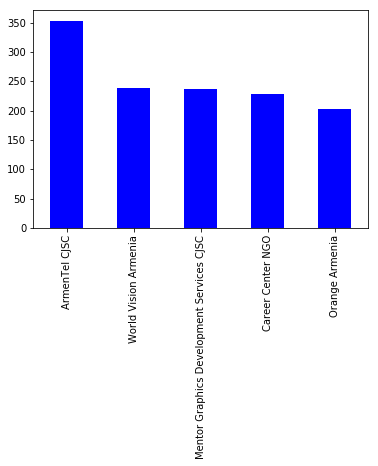

In [24]:
top5companyName.plot.bar(stacked=True, colormap='winter')

In [25]:
top5Title = df['Title'].value_counts()
top5Title[0:5]

Accountant                  328
Chief Accountant            219
Medical Representative      216
Sales Manager               166
Administrative Assistant    155
Name: Title, dtype: int64

# Analysis of Title Data

In [27]:
Title= df['Title'].dropna()

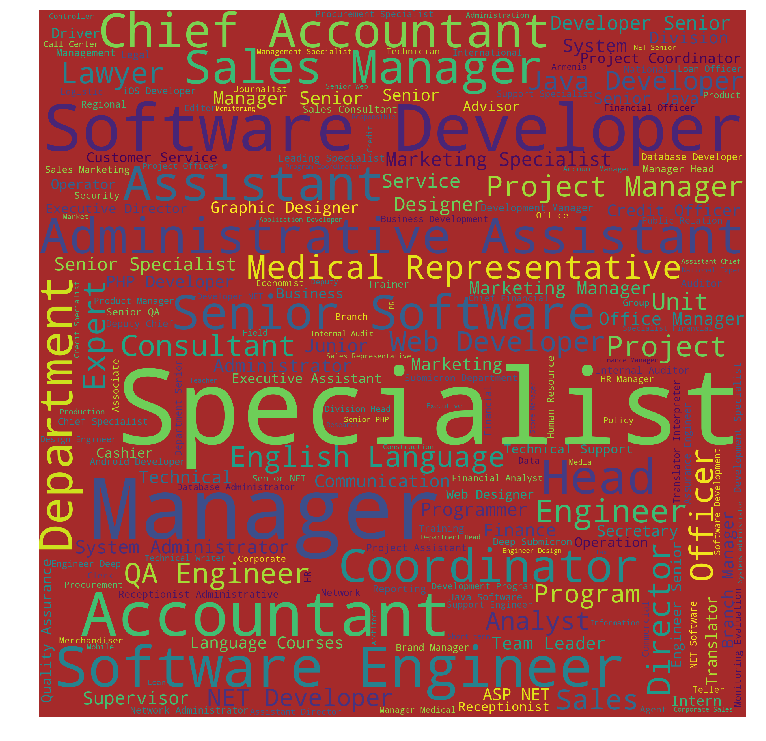

In [28]:
from wordcloud import WordCloud, STOPWORDS

def showWordCloud(data):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords = STOPWORDS,
                         background_color = 'brown',
                         width = 2500,
                         height = 2500
                         ).generate(cleaned_word)
    plt.figure(1,figsize = (13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

showWordCloud(Title)

In [29]:
Title = Title.tolist()

In [30]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [31]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(Title))

print(data_words[:1])

[['chief', 'financial', 'officer']]


In [32]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['chief', 'financial', 'officer']


In [33]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
def lemmatization(texts, allowed_postags=['NOUN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [34]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:4])

[['officer'], ['time', 'community', 'connection', 'intern', 'internship'], ['country', 'coordinator'], ['bcc', 'specialist']]


In [35]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1)]]


In [36]:
id2word[0]

'officer'

In [37]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:3]]

[[('officer', 1)],
 [('community', 1),
  ('connection', 1),
  ('intern', 1),
  ('internship', 1),
  ('time', 1)],
 [('coordinator', 1), ('country', 1)]]

# Build LDA Model for Title Data

In [38]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [39]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.160*"engineer" + 0.096*"assistant" + 0.081*"department" + 0.035*"head" + '
  '0.033*"director" + 0.030*"division" + 0.027*"support" + 0.021*"finance" + '
  '0.020*"communication" + 0.020*"auditor"'),
 (1,
  '0.113*"sale" + 0.101*"project" + 0.087*"marketing" + 0.080*"coordinator" + '
  '0.072*"consultant" + 0.057*"service" + 0.046*"representative" + '
  '0.017*"armenia" + 0.017*"logistic" + 0.015*"resource"'),
 (2,
  '0.218*"developer" + 0.161*"specialist" + 0.065*"software" + '
  '0.048*"development" + 0.042*"officer" + 0.038*"web" + 0.030*"java" + '
  '0.025*"designer" + 0.024*"analyst" + 0.022*"io"'),
 (3,
  '0.109*"administrator" + 0.071*"language" + 0.044*"database" + 0.041*"team" '
  '+ 0.034*"operator" + 0.034*"product" + 0.033*"network" + 0.032*"training" + '
  '0.029*"translator" + 0.024*"leader"'),
 (4,
  '0.296*"manager" + 0.052*"accountant" + 0.038*"expert" + 0.037*"branch" + '
  '0.035*"program" + 0.029*"system" + 0.027*"php" + 0.027*"management" + '
  '0.023*"co

In [40]:
# Compute Model Perplexity and Coherence Score

In [41]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.880818200395069

Coherence Score:  0.6099180617086276


In [42]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.397162 -0.015745       1        1  28.780508
0     -0.122403 -0.356667       2        1  23.638647
4     -0.107286  0.222179       3        1  21.989908
1     -0.100366  0.104791       4        1  16.016991
3     -0.067107  0.045442       5        1   9.573948, topic_info=     Category         Freq            Term        Total  loglift  logprob
26    Default  2735.000000         manager  2735.000000  30.0000  30.0000
10    Default  2640.000000       developer  2640.000000  29.0000  29.0000
9     Default  1946.000000      specialist  1946.000000  28.0000  28.0000
138   Default  1589.000000        engineer  1589.000000  27.0000  27.0000
140   Default   760.000000            sale   760.000000  26.0000  26.0000
13    Default   958.000000       assistant   958.000000  25.0000  25.0000
97    Default   679.000000         project   679.000000  24.0000  24.0000
39    Default   805.000000      department   805.000000  23.0000  23.0000
38    Default   587.000000       marketing   587.000000  22.0000  22.0000
27    Default   440.000000   administrator   440.000000  21.0000  21.0000
6     Default   539.000000     coordinator   539.000000  20.0000  20.0000
11    Default   790.000000        software   790.000000  19.0000  19.0000
53    Default   487.000000      consultant   487.000000  18.0000  18.0000
52    Default   485.000000      accountant   485.000000  17.0000  17.0000
25    Default   581.000000     development   581.000000  16.0000  16.0000
150   Default   384.000000         service   384.000000  15.0000  15.0000
80    Default   285.000000        language   285.000000  14.0000  14.0000
0     Default   506.000000         officer   506.000000  13.0000  13.0000
136   Default   460.000000             web   460.000000  12.0000  12.0000
222   Default   308.000000  representative   308.000000  11.0000  11.0000
90    Default   348.000000          expert   348.000000  10.0000  10.0000
672   Default   346.000000          branch   346.000000   9.0000   9.0000
217   Default   348.000000            head   348.000000   8.0000   8.0000
18    Default   328.000000         program   328.000000   7.0000   7.0000
15    Default   329.000000        director   329.000000   6.0000   6.0000
190   Default   358.000000            java   358.000000   5.0000   5.0000
223   Default   303.000000        division   303.000000   4.0000   4.0000
141   Default   178.000000        database   178.000000   3.0000   3.0000
72    Default   273.000000          system   273.000000   2.0000   2.0000
66    Default   166.000000            team   166.000000   1.0000   1.0000
...       ...          ...             ...          ...      ...      ...
28     Topic5   132.356506         network   133.120483   2.3404  -3.4156
56     Topic5   127.236168        training   127.998924   2.3401  -3.4551
111    Topic5   115.827721      translator   116.588394   2.3396  -3.5490
65     Topic5    97.862076          leader    98.620239   2.3384  -3.7175
382    Topic5    97.688835      monitoring    98.454170   2.3383  -3.7193
73     Topic5    84.432884     information    85.194916   2.3371  -3.8651
637    Topic5    83.437798          editor    84.200089   2.3370  -3.8770
105    Topic5    73.850716       education    74.617218   2.3358  -3.9991
98     Topic5    73.337463           agent    74.099098   2.3358  -4.0060
463    Topic5    45.253880          affair    46.021656   2.3293  -4.4888
469    Topic5    43.084499          teller    43.844738   2.3286  -4.5379
179    Topic5    39.840847             adp    40.605892   2.3271  -4.6162
952    Topic5    34.783642          fellow    35.543682   2.3245  -4.7520
87     Topic5    34.798100     facilitator    35.558491   2.3245  -4.7515
74     Topic5    33.374680         teacher    34.131100   2.3237  -4.7933
282    Topic5    31.612293           youth    32.403973   2.3214  -4.8476
75     Topic5    29.914492 

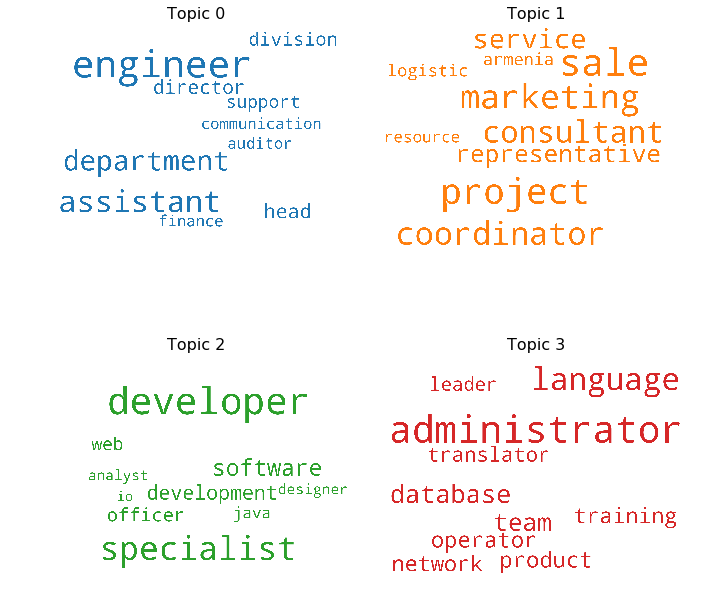

In [43]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Hyperparameter Tuning - Number of Topics and Alpha

In [44]:
# compute coherence value at various values of alpha and num_topics
def compute_coherence_values(dictionary, corpus, texts, num_topics_range, alpha_range):
    
    coherence_values = []
    model_list = []
    for alpha in alpha_range:
        for num_topics in num_topics_range:
            lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics, 
                                               alpha=alpha,
                                               per_word_topics=True)
            model_list.append(lda_model)
            coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append((alpha, num_topics, coherencemodel.get_coherence()))
        

    return model_list, coherence_values

In [45]:
num_topics_range = [2, 6, 10, 15, 20]
alpha_range = [0.01, 0.1, 0.001]
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        num_topics_range=num_topics_range, 
                                                        alpha_range=alpha_range)

In [46]:
coherence_df = pd.DataFrame(coherence_values, columns=['alpha', 'num_topics', 'coherence_value'])
coherence_df

,alpha,num_topics,coherence_value
0,0.010,2,0.565453
1,0.010,6,0.546964
2,0.010,10,0.576502
3,0.010,15,0.597188
4,0.010,20,0.609445
5,0.100,2,0.531227
6,0.100,6,0.519916
7,0.100,10,0.581050
8,0.100,15,0.621844
9,0.100,20,0.634526


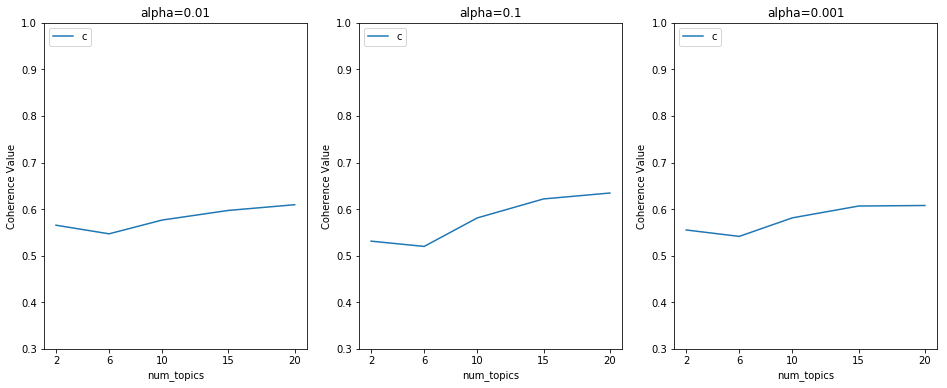

In [47]:
def plot_coherence(coherence_df, alpha_range, num_topics_range):
    plt.figure(figsize=(16,6))

    for i, val in enumerate(alpha_range):

        # subplot 1/3/i
        plt.subplot(1, 3, i+1)
        alpha_subset = coherence_df[coherence_df['alpha']==val]

        plt.plot(alpha_subset["num_topics"], alpha_subset["coherence_value"])
        plt.xlabel('num_topics')
        plt.ylabel('Coherence Value')
        plt.title("alpha={0}".format(val))
        plt.ylim([0.30, 1])
        plt.legend('coherence value', loc='upper left')
        plt.xticks(num_topics_range)

plot_coherence(coherence_df, alpha_range, num_topics_range)

In [48]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.1,
                                           per_word_topics=True)

In [49]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.400*"assistant" + 0.201*"accountant" + 0.086*"finance" + 0.061*"tax" + '
  '0.059*"accounting" + 0.050*"audit" + 0.028*"controller" + '
  '0.024*"sponsorship" + 0.023*"administration" + 0.015*"adp"'),
 (1,
  '0.348*"engineer" + 0.153*"project" + 0.122*"coordinator" + 0.087*"service" '
  '+ 0.060*"support" + 0.038*"design" + 0.027*"armenia" + 0.026*"application" '
  '+ 0.024*"center" + 0.020*"silicon"'),
 (2,
  '0.669*"specialist" + 0.077*"lawyer" + 0.058*"procurement" + '
  '0.033*"translator" + 0.029*"evaluation" + 0.028*"monitoring" + '
  '0.020*"contract" + 0.018*"recruitment" + 0.008*"law" + 0.008*"interpreter"'),
 (3,
  '0.219*"team" + 0.178*"logistic" + 0.168*"training" + 0.129*"leader" + '
  '0.044*"teacher" + 0.039*"technology" + 0.026*"component" + '
  '0.006*"mathematic" + 0.006*"assistance" + 0.000*"freight_forwarding"'),
 (4,
  '0.178*"expert" + 0.131*"language" + 0.126*"management" + 0.107*"course" + '
  '0.084*"quality" + 0.074*"control" + 0.053*"assurance" + 0.

In [50]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.218350954070242

Coherence Score:  0.5837145176778745


In [51]:
coherence_model_lda.get_coherence_per_topic()

[0.5518650408507002,
 0.5787942919360136,
 0.6284325477755288,
 0.5854546629564594,
 0.5730703265674377,
 0.6190623884312744,
 0.6089218995474007,
 0.5880956301710898,
 0.43142397485569123,
 0.6264328037916019,
 0.5591866649712696,
 0.6057935154080638,
 0.570909768258997,
 0.670974900467879,
 0.5572993491787116]

In [52]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12    -0.264075  0.364260       1        1  12.512798
1     -0.197287 -0.114971       2        1  10.042668
13    -0.232652 -0.284612       3        1   8.391062
2     -0.082789 -0.016650       4        1   7.497145
11    -0.008721 -0.003017       5        1   6.861476
8      0.060573  0.004299       6        1   6.657293
9      0.043900  0.002952       7        1   6.430665
4      0.045478  0.002995       8        1   6.427655
0     -0.012931 -0.003377       9        1   6.158413
7      0.087924  0.006508      10        1   5.569548
14     0.091122  0.006923      11        1   4.942482
5      0.107273  0.007960      12        1   4.852151
6      0.109731  0.008168      13        1   4.696310
10     0.112777  0.008426      14        1   4.664987
3      0.139678  0.010136      15        1   4.295345, topic_info=     Category         Freq                Term        Total  loglift  logprob
9     Default  2111.000000          specialist  2111.000000  30.0000  30.0000
26    Default  2513.000000             manager  2513.000000  29.0000  29.0000
10    Default  2047.000000           developer  2047.000000  28.0000  28.0000
138   Default  1472.000000            engineer  1472.000000  27.0000  27.0000
38    Default  1067.000000           marketing  1067.000000  26.0000  26.0000
140   Default  1116.000000                sale  1116.000000  25.0000  25.0000
13    Default  1036.000000           assistant  1036.000000  24.0000  24.0000
25    Default   980.000000         development   980.000000  23.0000  23.0000
39    Default   946.000000          department   946.000000  22.0000  22.0000
136   Default   825.000000                 web   825.000000  21.0000  21.0000
53    Default   767.000000          consultant   767.000000  20.0000  20.0000
15    Default   556.000000            director   556.000000  19.0000  19.0000
35    Default   537.000000            designer   537.000000  18.0000  18.0000
11    Default   613.000000            software   613.000000  17.0000  17.0000
97    Default   648.000000             project   648.000000  16.0000  16.0000
217   Default   538.000000                head   538.000000  15.0000  15.0000
52    Default   522.000000          accountant   522.000000  14.0000  14.0000
203   Default   476.000000             analyst   476.000000  13.0000  13.0000
90    Default   481.000000              expert   481.000000  12.0000  12.0000
91    Default   423.000000            business   423.000000  11.0000  11.0000
223   Default   469.000000            division   469.000000  10.0000  10.0000
66    Default   396.000000                team   396.000000   9.0000   9.0000
222   Default   453.000000      representative   453.000000   8.0000   8.0000
27    Default   463.000000       administrator   463.000000   7.0000   7.0000
190   Default   448.000000                java   448.000000   6.0000   6.0000
6     Default   515.000000         coordinator   515.000000   5.0000   5.0000
228   Default   421.000000                unit   421.000000   4.0000   4.0000
114   Default   360.000000       communication   360.000000   3.0000   3.0000
3     Default   347.000000              intern   347.000000   2.0000   2.0000
72    Default   387.000000              system   387.000000   1.0000   1.0000
...       ...          ...                 ...          ...      ...      ...
66    Topic15   394.974091                team   396.158020   3.1446  -1.5207
34    Topic15   320.837372            logistic   322.021301   3.1440  -1.7286
56    Topic15   303.383270            training   304.567200   3.1437  -1.7846
65    Topic15   233.256424              leader   234.440338   3.1426  -2.0474
74    Topic15    79.329292             teacher    80.513214   3.1328  -3.1260
75    Topic15    71.084450          technology    72.268372   3.1311  -3.2357
348   Topic15    46.782169           component    47.966091   3.1226  -3.65

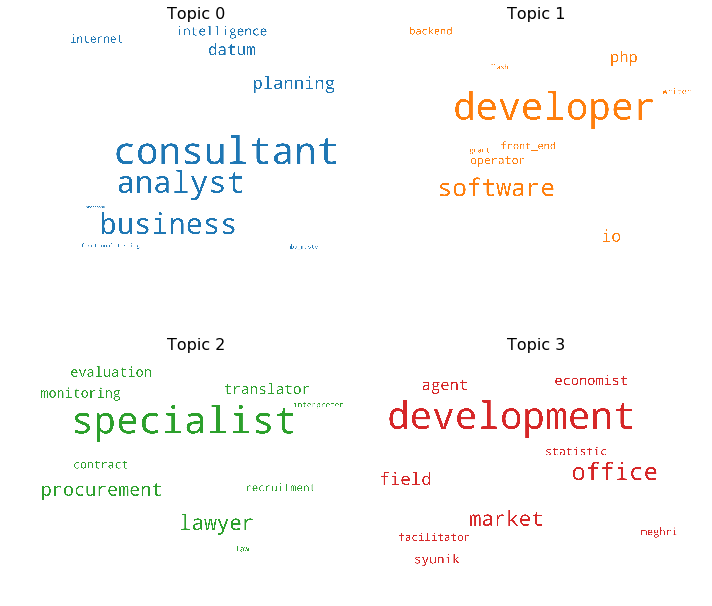

In [53]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()